In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng
import numpy.linalg as LA
np.set_printoptions(precision = 3)

In [3]:
vectors = 10000

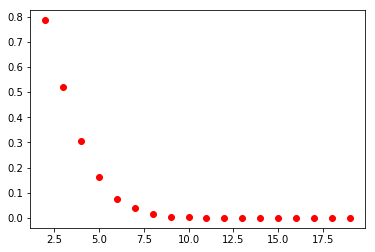

In [4]:
def ratio (d):  
  uniform = rng.random((vectors, d))*2-1  
  normOfVector= LA.norm(uniform, axis=1)
  insideHypersphere = 1*(normOfVector <=1)
  return sum(insideHypersphere)/vectors
darray = np.arange(2,20)
vectorRatio = np.vectorize(ratio)
plt.plot(darray, vectorRatio(darray), 'ro')

[-0.173 -0.312 -0.383 -0.452 -0.321  0.404  0.162  0.381 -0.29 ] 1.0
[-0.122 -0.066  0.068 -0.4   -0.086  0.519  0.208 -0.628 -0.32 ] 1.0
[-0.446 -0.259 -0.252  0.725  0.008 -0.044  0.363  0.038 -0.099] 1.0
[ 0.512  0.12   0.136 -0.249 -0.212  0.335 -0.025 -0.614  0.329] 1.0
[ 1.  1.  1.  1.]


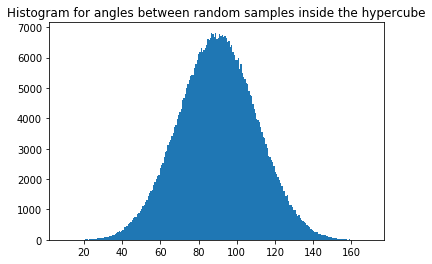

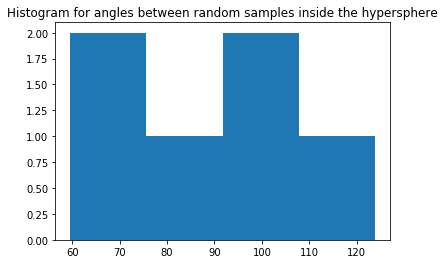

In [27]:
d=9
vectors = 1000
uniform = rng.random((vectors, d))*2-1
insideHypersphere = uniform[LA.norm(uniform, axis=1)<=1]

for vector in insideHypersphere:
  vector /= (LA.norm (vector))

def indices(x):
  indexPairs = np.array(np.indices((x.shape[0],x.shape[0]))).T.reshape(-1,2)
  return np.array(indexPairs[indexPairs[:,0]<indexPairs[:,1]]).T

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

@np.vectorize
def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    #print (thevector)
    v1_u = unit_vector(thevector[v1])
    v2_u = unit_vector(thevector[v2])
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

thevector = uniform
index1, index2 = indices(thevector)
angels = np.degrees(angle_between(index1,index2))
plt.hist(angels, bins='auto')
plt.title("Histogram for angles between random samples inside the hypercube")
plt.show()

thevector = insideHypersphere
index1, index2 = indices(thevector)
angels = np.degrees(angle_between(index1,index2))
plt.hist(angels, bins='auto')
plt.title("Histogram for angles between random samples inside the hypersphere")
plt.show()

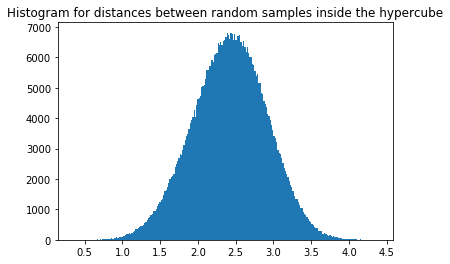

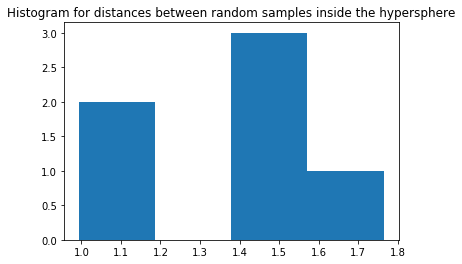

In [28]:
@np.vectorize
def distance_between(index1, index2):
    return LA.norm(thevector[index1]-thevector[index2])
thevector = uniform
index1, index2 = indices(thevector)
distances = distance_between(index1,index2)
plt.hist(distances, bins='auto')
plt.title("Histogram for distances between random samples inside the hypercube")
plt.show()

thevector = insideHypersphere
index1, index2 = indices(thevector)
distances = distance_between(index1,index2)
plt.hist(distances, bins='auto')
plt.title("Histogram for distances between random samples inside the hypersphere")
plt.show()